# Data Exploration and Visualisation

## Importing Libraries

In [36]:
import os
import cv2
import random
import numpy as np 
import pandas as pd 
import seaborn as sns

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# To plot pretty figures
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt

## Data Loading 

This step loads the images contained in the training dataset.

In [37]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [38]:
train_img = [] #contains the images used for training the model
train_labels = [] #label of each image in x_train 
PATH = '../input/brain-tumor-classification-mri/Training'

for label in labels:
    img_dir = os.path.join(PATH, label)
    for img_file in os.listdir(img_dir):
        img = cv2.imread(f'{img_dir}/{img_file}')
        train_img.append(img)
        train_labels.append(label)
#train_img = np.array(train_img)
#train_labels = np.array(train_labels)

## Sample images 

Here we visualize the first 5 images and check that the images are loaded properly

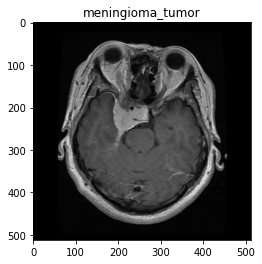

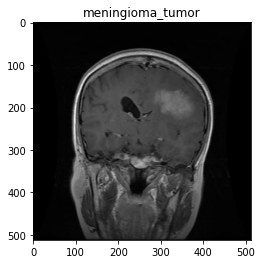

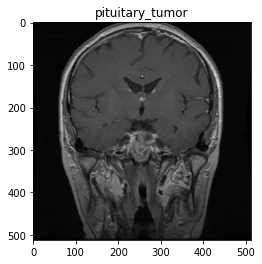

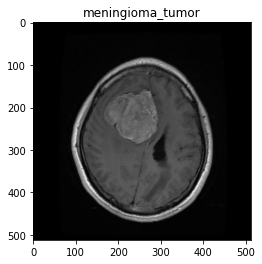

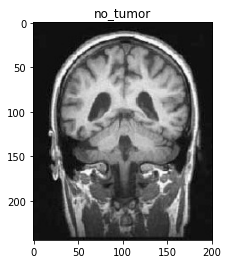

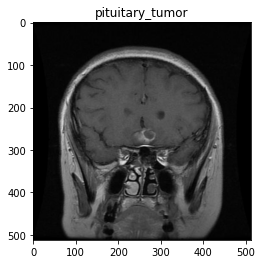

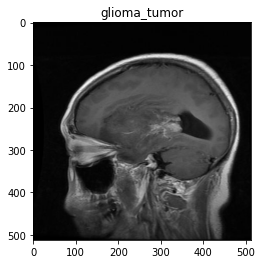

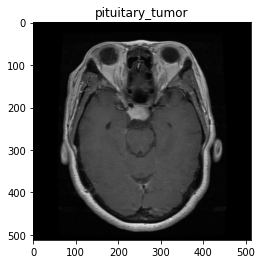

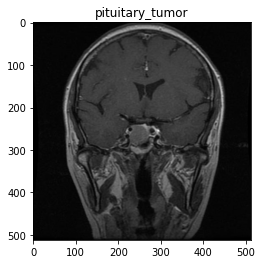

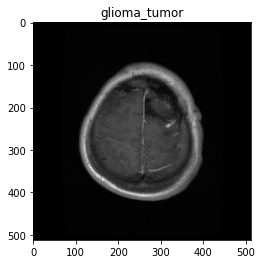

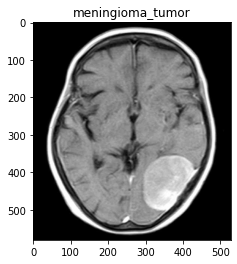

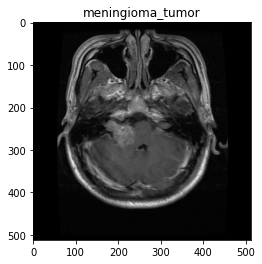

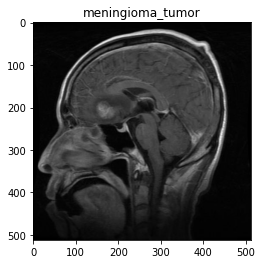

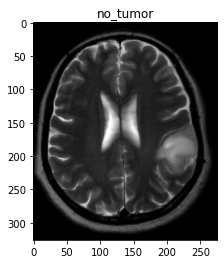

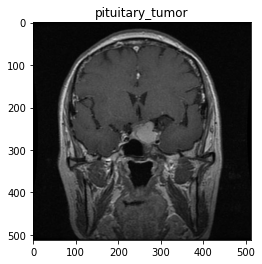

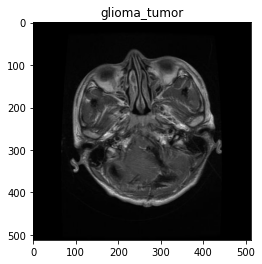

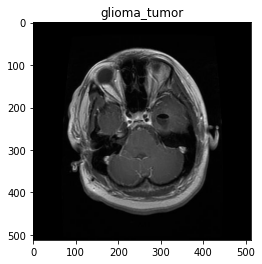

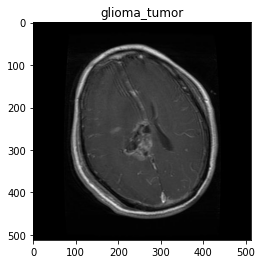

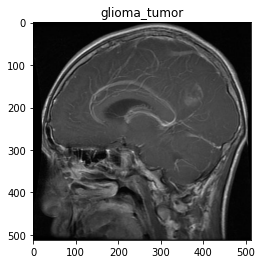

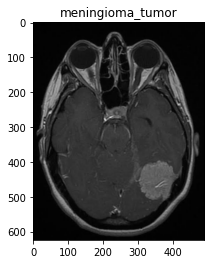

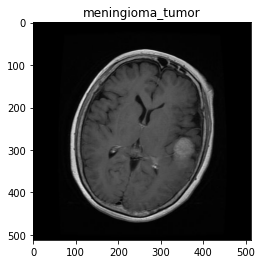

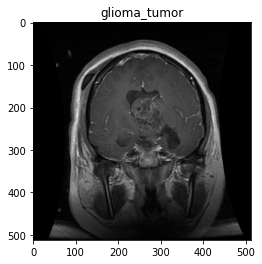

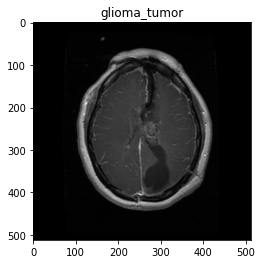

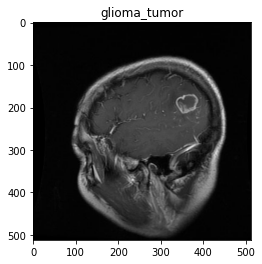

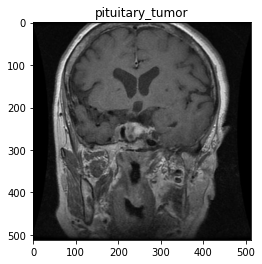

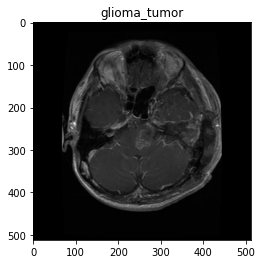

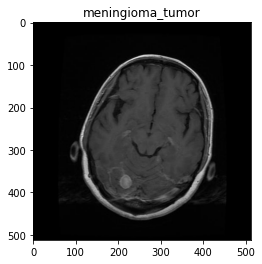

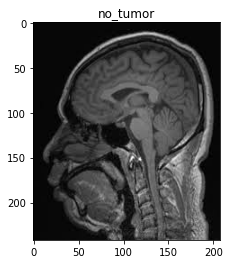

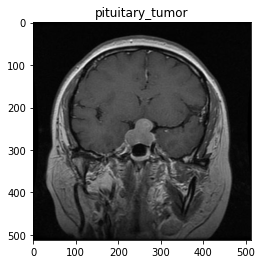

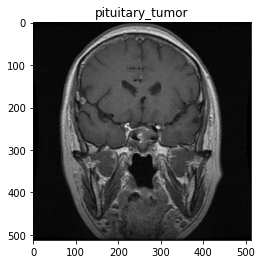

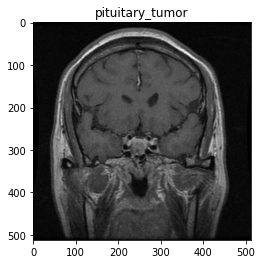

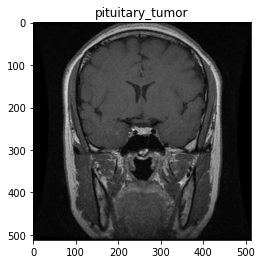

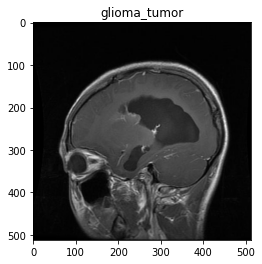

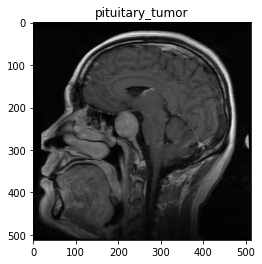

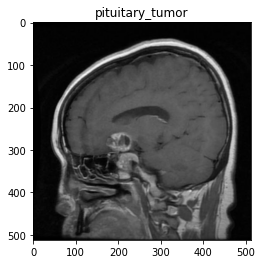

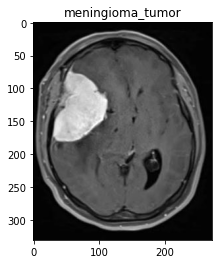

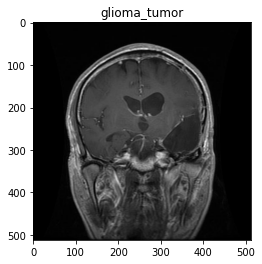

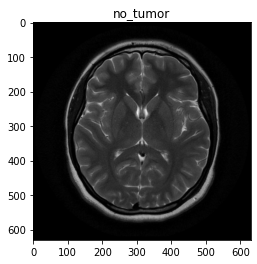

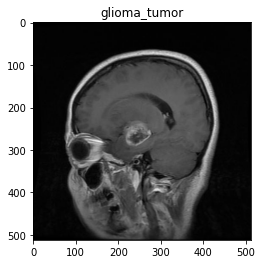

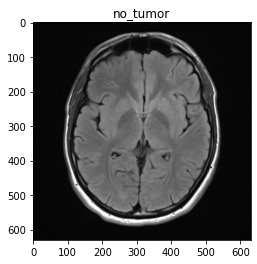

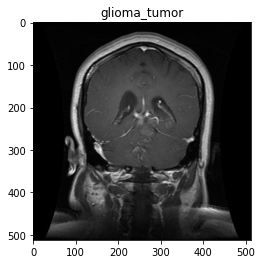

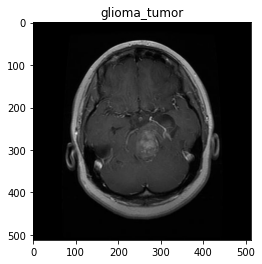

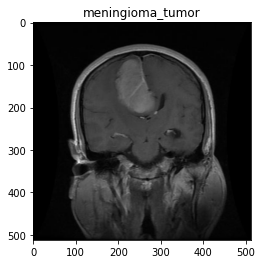

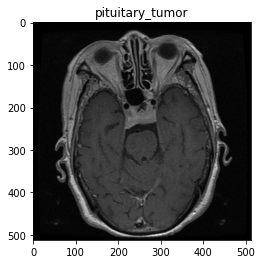

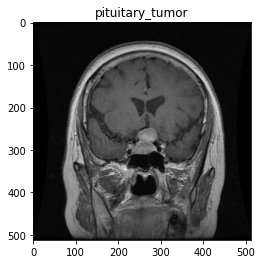

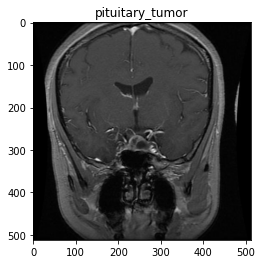

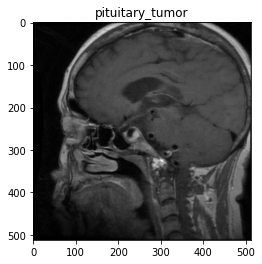

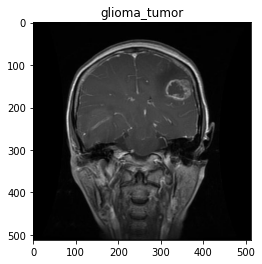

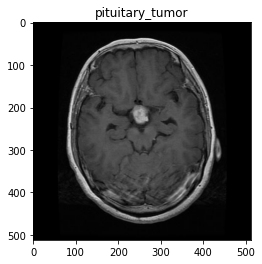

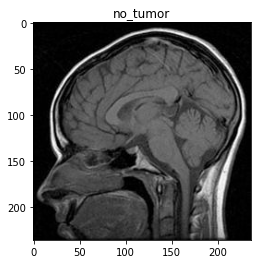

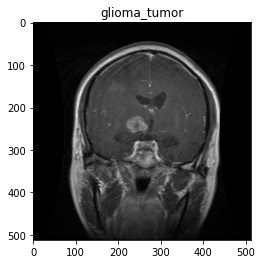

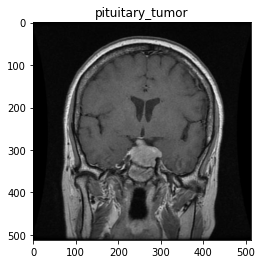

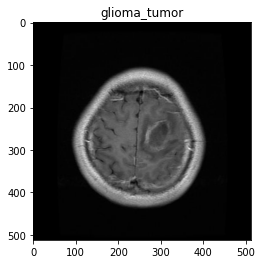

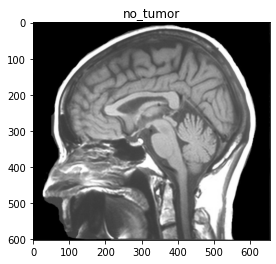

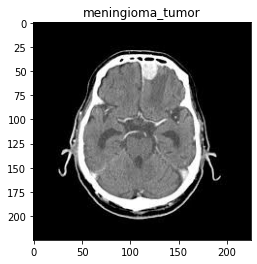

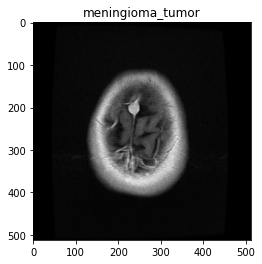

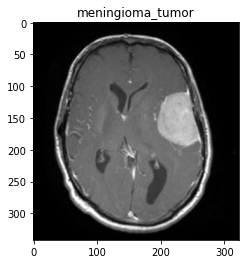

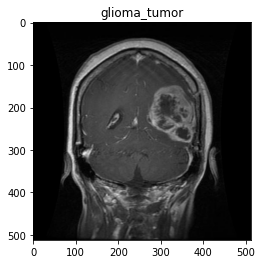

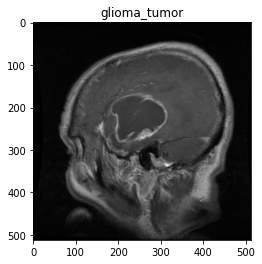

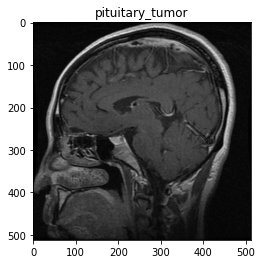

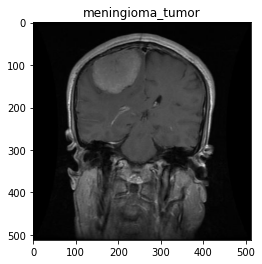

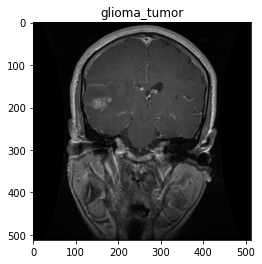

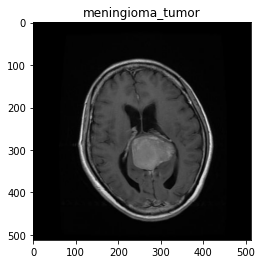

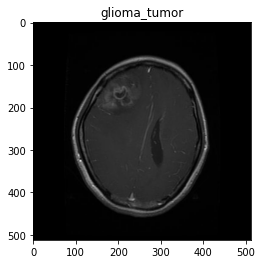

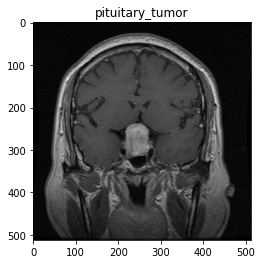

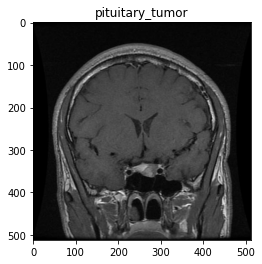

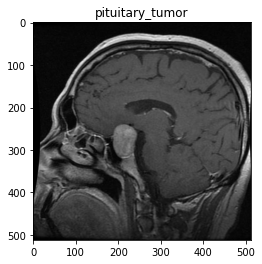

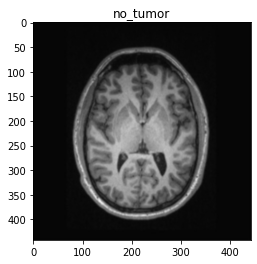

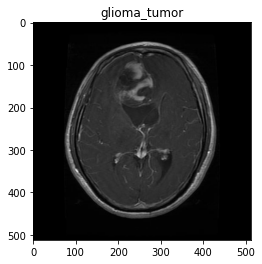

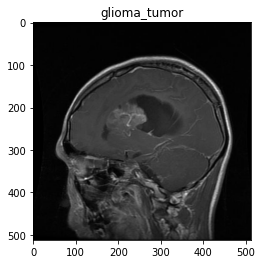

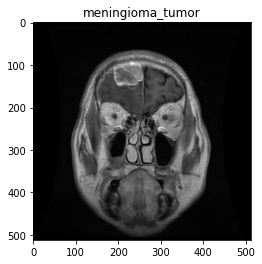

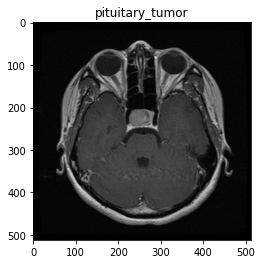

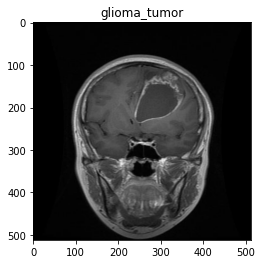

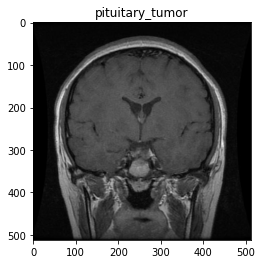

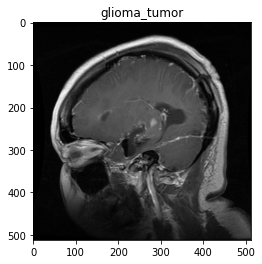

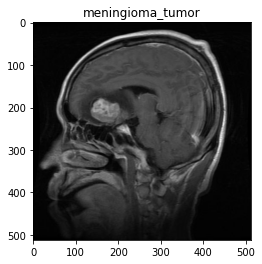

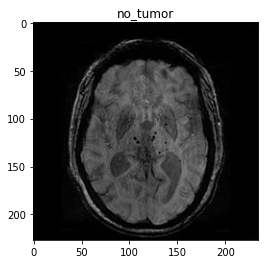

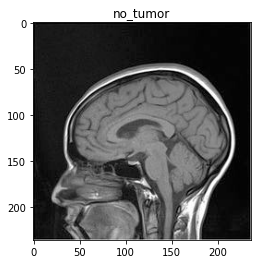

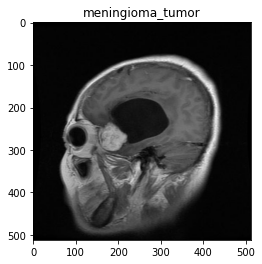

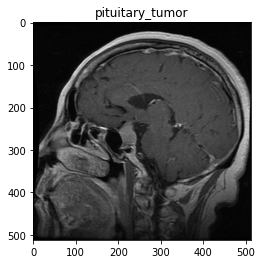

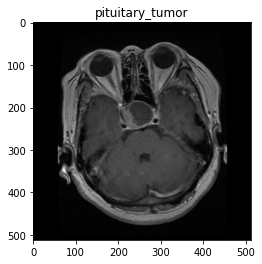

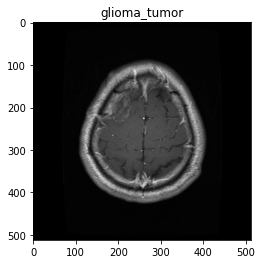

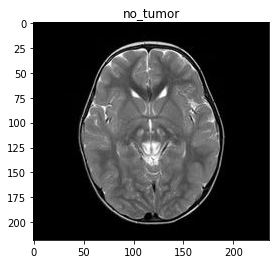

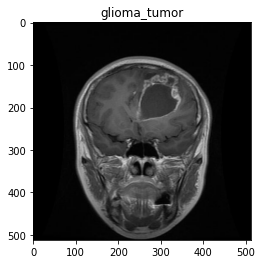

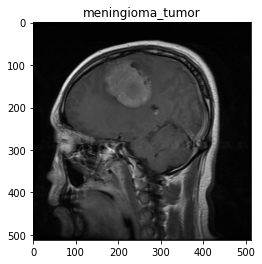

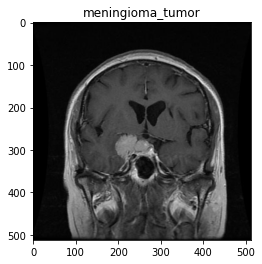

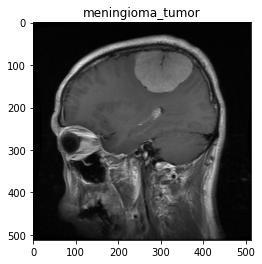

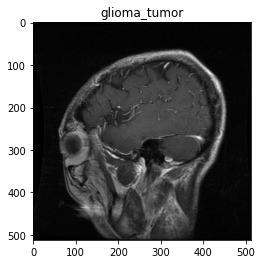

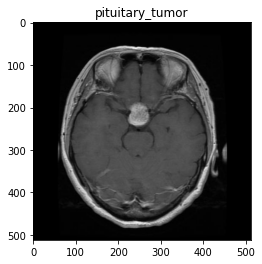

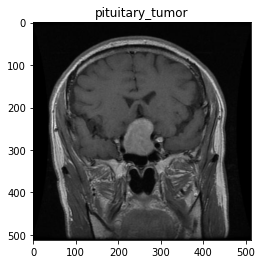

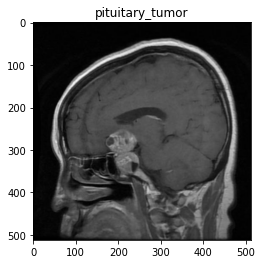

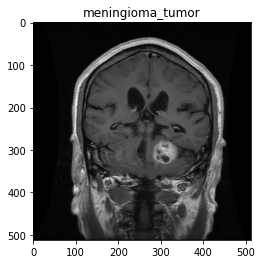

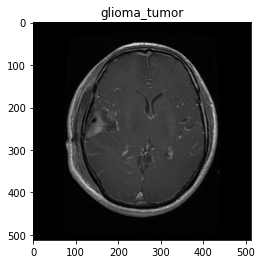

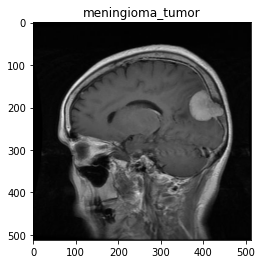

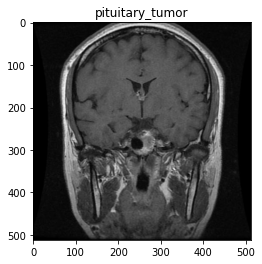

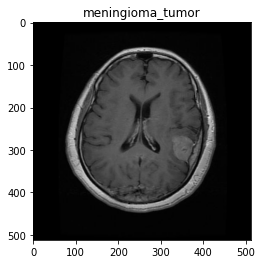

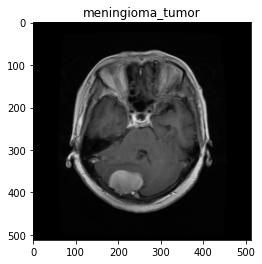

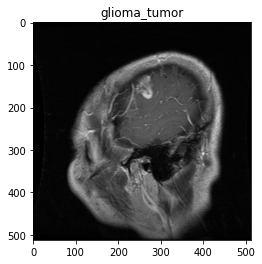

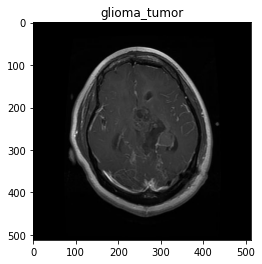

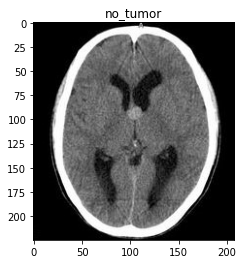

In [39]:
count = 0

while count < 5:
    i = random.randrange(len(train_img))
    img = train_img[i]
    plt.figure()
    plt.imshow(img)
    plt.title(train_labels[i])
    plt.show()
    count += 1

In [ ]:

count = 0
while count < 100:
    z = np.where(y_train==0)[count]
    on = np.where(y_train==1)[count]
    tw = np.where(y_train==2)[count]
    th = np.where(y_train==3)[count]
    plt.figure()
    plt.subplot(1,4,1)
    img = train_img[z]
    plt.figure()
    plt.imshow(img)
    plt.title(train_labels[z])
    plt.show()
    count += 1

## Resizing the images
The images above are of different sizes of which some of them are very large. We need to resize all the images to a smaller size to help speed up the training process of the models we would be working with. Also, this would make sure that all the images are of the same size which is what a model would expect.

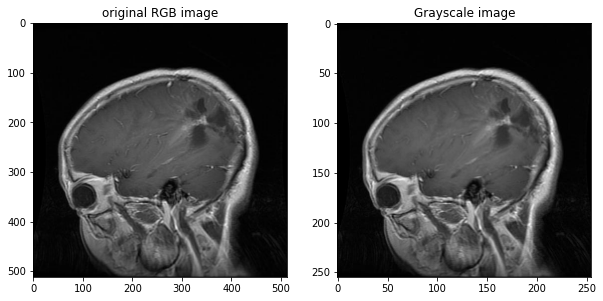

Grayscale shape : (255, 255)
Grayscale max value : 0.9490196078431372


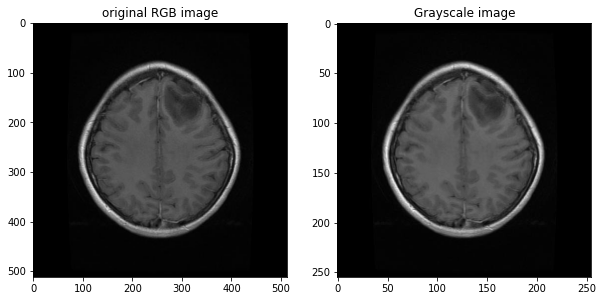

Grayscale shape : (255, 255)
Grayscale max value : 0.9137254901960784


KeyboardInterrupt: 

In [40]:
new_size = (255, 255)

for i in range(len(train_img)):
    img = train_img[i] 
    train_img[i] = cv2.resize(img, new_size)
    train_img[i] = cv2.cvtColor(train_img[i], cv2.COLOR_RGB2GRAY)/255
    if i<3:
        fig, ax = plt.subplots(1,2,figsize=(10,10))
        ax[0].imshow(img)
        ax[0].set_title("original RGB image")
        ax[1].imshow(train_img[i], cmap = 'gray')
        ax[1].set_title("Grayscale image")
        plt.show()
        print("Grayscale shape :", train_img[i].shape)
        print("Grayscale max value :",train_img[i].max())

In [ ]:
img = train_img[1]
img.shape

In [ ]:
train_img = np.stack(train_img)
train_labels = np.stack(train_labels)

print("train_img shape : ", train_img.shape)
print("train_labels shape : ", train_img.shape)

## Show sample image from each class of tumor

In [ ]:
k =0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s="Sample Image From Each Class of Tumor", 
         size=20, 
         fontweight='bold',
         fontname='monospace',
         y=0.62,
         x=0.4,
         alpha=0.8
        )

for i in labels:
    j = 0
    while True:
        if train_labels[j] == i:
            sh = ax[k].imshow(train_img[j], cmap = 'gray')
            fig.colorbar(sh, ax=ax[k], shrink=0.2)
            ax[k].set_title(train_labels[j])
            k += 1
            break
        j += 1
            
            

## Bar Chart 

The Bar plot shows how many data points in each class of brain tumor present in the train dataset

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(train_labels)

## Pie Chart

The Pie chart shows classes of brain tumors in proportion to each other. 

In [ ]:
# Get the count of images for each class of tumor

train_dict = {}
class_count = []
tumor_classes = []

for tumor_class in train_labels:
       
    if train_dict.get(tumor_class):
        train_dict[tumor_class] += 1
    else:
        train_dict[tumor_class] = 1

for tumor_class, count in train_dict.items():
    tumor_classes.append(tumor_class)
    class_count.append(count)
    print(str(tumor_class) + " contains: " + str(count) + " images" )
    



In [ ]:
# Plot the pie chart

plt.pie(class_count, startangle=90,explode=[0.1,0.1,0.1,0.2],autopct='%0.2f%%',
        labels=tumor_classes,radius=3)
plt.show()

In [ ]:
class_map = {
    'no_tumor': 0,
    'glioma_tumor': 1,
    'pituitary_tumor': 2,
    'meningioma_tumor': 3
}

train_labels = np.array([class_map[label] for label in train_labels])

test_img = [] #contains the images used for training the model
test_labels = [] #label of each image in x_train 
PATH = '../input/brain-tumor-classification-mri/Testing'

for label in labels:
    img_dir = os.path.join(PATH, label)
    for img_file in os.listdir(img_dir):
        img = cv2.imread(f'{img_dir}/{img_file}')
        test_img.append(img)
        test_labels.append(label)
test_img = np.array(test_img)
test_labels = np.array(test_labels)

import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
algos = ['f', 'mi', 'logreg', 'lightgbm', 'mrmr']
ks = [1, 2, 5, 10, 15, 20, 30, 40]
accuracy = pd.DataFrame(index = ks, columns = algos)
for algo in algos:
  
  for nfeats in ks:
    feats = ranking[algo][:n_feats]
    
    clf = CatBoostClassifier().fit(
      train_img[:, feats], train_labels,
      eval_set = (test_img[:, feats],test_labels),
      early_stopping_rounds = 20
    )
                
    accuracy.loc[k, algo] = accuracy_score(
      y_true = test_labels, y_pred = clf.predict(test_img[:, cols]))

!pip install mrmr-selection
from mrmr import mrmr_classif
mrmr = mrmr_classif(train_img, train_labels)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(train_img.reshape((2870, 255*255)), train_labels)

# Dimensionality reduction by PCA implementation

PCA enables to extract a specific number of features while conserving an acceptable amount of information (variance) from original features. 
It consists in projecting the original dataset (standardized) in a less dimensional space such that its variance is maximized, given by the formula : $X_{pca} = X_{original}.W$, the number of W columns corresponding to the number of extracted features.
The first component is : 

$$w_{1} = \underset{||w||=1}{argmax}\Bigg\{||Xw||^{2}\Bigg\} = \underset{w}{argmax}\Bigg\{\frac{w^{T}X^{T}Xw}{w^{T}w}\Bigg\} $$


Other W components are obtained by first computing the substraction of $k-1$ PC:
$$\hat{X}_{k} = X -  \sum \limits_{j=1}^{k-1} Xw_{j}w_{j}^{T}$$

And then by computing : 

$$w_{k} = \underset{w}{argmax}\Bigg\{\frac{w^{T}\hat{X}_{k}^{T}\hat{X}_{k}w}{w^{T}w}\Bigg\}$$


## Reduced dataset creation : 250 samples per class

In [ ]:
list_index = []

glioma_index = np.where(train_labels == 1)[0][0]
list_index.append(glioma_index)

meningioma_index = np.where(train_labels == 2)[0][0]
list_index.append(meningioma_index)

no_tumor_index = np.where(train_labels == 0)[0][0]
list_index.append(no_tumor_index)

pituitary_index = np.where(train_labels == 3)[0][0]
list_index.append(pituitary_index)

x_train = []
y_train = []
for ind in list_index:
    x_train.append(train_img[ind : ind+250])
    y_train.append(train_labels[ind : ind + 250])


flat_train = np.stack(x_train)
flat_train = flat_train.reshape((flat_train.shape[0]*flat_train.shape[1], 255*255))

flat_label = np.stack(y_train)
flat_label = flat_label.reshape((flat_label.shape[0]*flat_label.shape[1]))

print("dataset shape : ", flat_train.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler #the Standard Scaler : X2 = (X1 - E(X1))/sqrt(Var(X1))
from sklearn.decomposition import PCA


S = StandardScaler()
flat_train = S.fit_transform(flat_train) 

pca = PCA().fit(flat_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('cumvar(PCA components)')

Conserving ~300 features from the images already allows to keep 90% of the original dataset variance. We choose then to perform a PCA with 300 components. So the final samples have 300 features

In [ ]:
# also possible to specify variance explained ration instead of number of components 
# e.g. nb_components = 0.9 means conserving 90% of original variance

pca = PCA(n_components = 300)

pca_train = pca.fit_transform(flat_train)

print("dataset final shape : ", pca_train.shape)

## Inverse PCA (300 features) transform and 3D Visualization

In [ ]:
#all index of a certain class 
label = 'meningioma_tumor'
clas = class_map[label]
ind = np.where(flat_label == clas)[0]
rand_ind = np.random.choice(ind)

#PCA inverse transform
X_inv = pca.inverse_transform(pca_train)

#original sample
x_orig = flat_train[rand_ind].reshape(255,255)
#pca inv transform sample
x_pca = X_inv[rand_ind].reshape(255,255)

#plot comparison between original and pca inverse transform
fig, axs = plt.subplots(1,2, figsize = (15, 5))
im1 = axs[0].imshow(x_orig, cmap = 'gray')
axs[0].set_title('Original train sample, class = {}'.format(label))
plt.colorbar(im1, ax = axs[0])

im2 = axs[1].imshow(x_pca, cmap = 'gray')
axs[1].set_title('Inverse PCA transform of same train sample, class = {}'.format(label))
plt.colorbar(im2, ax = axs[1])
fig.tight_layout()
plt.show()

In [ ]:
scatter_x = pca_train[:, 0]
scatter_y = pca_train[:, 1]
scatter_z = pca_train[:, 2]
print(pca_train.shape, flat_label.shape)
group = flat_label

cdict = {0: 'red', 1: 'blue', 2: 'green', 3 : "orange"}
identification = {v : k for k,v in class_map.items()}


plt.figure()
ax = plt.axes(projection = '3d')
plt.grid()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter3D(scatter_x[ix], scatter_y[ix], scatter_z[ix], c = cdict[g], label = identification[g], s = 30)
ax.legend(bbox_to_anchor =(1.95,0.75))
plt.xlabel("PCA feature 1")
plt.ylabel("PCA feature 2")
ax.set_zlabel("PCA feature 3")
plt.title("Classes 3D features (by PCA) representation")
plt.show()

A priori, the separation between classes in 3D PCA space is poor. We can test some classical ML algorithms to still check the separability of pca samples.

## Tests with some classical classifiers

In [ ]:
from sklearn.model_selection import train_test_split

pca_tr, pca_test, y_tr, y_test = train_test_split(pca_train, flat_label, test_size = 0.3, random_state = 42)

### Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix #to provide confusion matrix with rows = True values and columns = Predicted values

NB = GaussianNB()

NB.fit(pca_train, flat_label)

y_pred = NB.predict(pca_test)

cm1 = confusion_matrix(y_test, y_pred)
acc1 = np.sum(np.diag(cm1))/np.sum(cm1)
print("naive bayes accuracy :\n", acc1)

### KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

metrics = ['cityblock', 'cosine', 'minkowski']
neighbors = range(3, 15)
best_acc = 0
best_ney = 0
best_acc = 0
best_cm = np.zeros((4, 4))
best_metric = ''
for metric in metrics :
    for ney in neighbors:
        knn = KNeighborsClassifier(n_neighbors = ney, metric = metric)
        knn.fit(pca_tr, y_tr)
        y_predict = knn.predict(pca_test)
        cm = confusion_matrix(y_test, y_predict)
        acc = np.sum(np.diag(cm))/np.sum(cm)
        if acc>best_acc:
            best_ney = ney
            best_cm = cm
            best_acc = acc
            best_metric = metric

print("Best metric :", best_metric)
print("Best k neighbors =", best_ney)
print("Best acc =", best_acc)

### SVM

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel = "rbf", decision_function_shape = 'ovr')

SVM.fit(pca_tr, y_tr)

y_predict = SVM.predict(pca_test)

cm2 = confusion_matrix(y_test, y_predict)
acc2 = np.sum(np.diag(cm2))/np.sum(cm2)
print("SVM accuracy \n", acc2)